# Cherry Blossom Race Analysis

## Abstract
FILL IN WITH A HIGH LEVEL OVERVIEW OF WHATEVER IS DONE IN THIS DOC

## Introduction
The Cherry Blossom race results were scraped from http://cherryblossom.org/ using R and code from Daniel Kaplan and Deborah Nolan in the book Data Science in R: A Case Studies Approach[1]. Extensive data cleaning was performed on the age and run times for each runner. Some problems not addressed in the book were inspected and corrected resulting in dataframes that correspond to dataframes in the book at section 2.4 save for a few records that were simply deleted. The deleted entries were those records identified to have ages less than 5.

This analysis centers on exercise 11 from [1]:
+ <strong>Q.11</strong> Normalize each male runner’s time by the fastest time for the runner of the same age. To do this, find the fastest runner for each year of age from 20 to 80. The tapply() function may be helpful here. Smooth these times using loess(), and find the smoothed time using predict(). Use these smoothed times to normalize each run time. Use density plots, quantile–quantile plots, and summary statistics to compare the distribution of the age-normalized times for the runners in 1999 and 2012. What do you find? Repeat the process for the women. Compare the women in 1999 to the women in 2012 and to the men in 1999 and 2012.

## Methods
FILL IN WITH METHODS USED

In [1]:
load("cbMen.rda")
load("cbWomen.rda")

In [123]:
#the book didn't address the NA ages unfortunately (not in sections 2.1 to 2.3 at least)
#i'll try to get ages by looking at runners who competed in multiple years
#also some of these look hopeless, like Runner Dx lii xviii
cbMen[is.na(cbMen$age),]

,year,sex,name,home,age,runTime
1999.1083,1999,M,Rob Faye,Vienna VA,NA,78.25000
2002.1227,2002,M,William STEIGEL,Washington DC,NA,77.70000
2002.2490,2002,M,Dave BOYER,Washington DC,NA,91.31667
2005.267,2005,M,John Marquart,Madison WI,NA,66.01667
2005.542,2005,M,Runner Dx Iii X Viii,Rockville MD,NA,69.76667
2005.925,2005,M,Runner Cb Vii Ix V,Rockville MD,NA,77.55000
2005.1158,2005,M,Runner Xx,Rockville MD,NA,78.80000
2005.1791,2005,M,Joseph Ferguson,Richmond VA,NA,86.68333
2005.2129,2005,M,Runner Bc Iii Ii O,Rockville MD,NA,87.00000
2005.3464,2005,M,Ronald Henry,Arlington VA,NA,97.16667


In [131]:
nms = as.vector(cbMen[is.na(cbMen["age"]),"name"])
inds = unlist(lapply(nms, FUN=function(x) grep(x, cbMen[,"name"]))) #also need to unlist

In [133]:
#we only get 7 unique people back, we'll just skip fixing them for now
matches = cbMen[inds,]
matches[!is.na(matches$age),]

,year,sex,name,home,age,runTime
2000.1257,2000,M,Rob Faye,Vienna VA,34,81.53333
2003.586,2003,M,John Marquart,Madison WI,46,69.60000
2004.3193,2004,M,Joseph Ferguson,Richmond VA,39,94.28333
2008.386,2008,M,Jim Catella,Washington DC,27,67.23333
2010.4302,2010,M,Unknown,,38,92.65000
2008.484,2008,M,Dan Kahn,Gaithersburg MD,42,68.73333
2009.626,2009,M,Dan Kahn,Gaithersburg MD,43,69.76667
2010.431,2010,M,Dan Kahn,Gaithersburg MD,44,67.28333
2005.134,2005,M,Bart Forsyth,Arlington VA,27,61.41667
2006.101,2006,M,Bart Forsyth,Arlington,28,59.86667


In [143]:
#from here i can overwrite the incorrect ages, i'll do it later perhaps, we'll only gain 7 though so probably not a big deal

In [42]:
#first subset to ages 20 through 80, also remove NA's for age???? even though we verified there were none
df = cbMen[((cbMen$age >= 20) & !is.na(cbMen$age) & (cbMen$age <= 80)),]
summary(df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   30.00   37.00   38.82   46.00   80.00 

In [111]:
#okay, how can we do this for every year individually all at once?
bestTimes = lapply(unique(df$year), 
                   function(x) aggregate(df[which(df$year == x),"runTime"], by=list(df[which(df$year == x),"age"]), min))

In [112]:
#change the names of each dataframe to their year for easier referencing
names(bestTimes) = 1999:2012
for (i in 1999:2012){
    names(bestTimes[[as.character(i)]]) = c("age", "bestTime")
    bestTimes[[as.character(i)]]["year"] = i
}
bestTimes = do.call("rbind", bestTimes) #make it into a single dataframe
unique(bestTimes$year)

[1] 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012

In [121]:
df = merge(df, bestTimes, by=c("age", "year"))
tail(df)

,age,year,sex,name,home,runTime,bestTime
69359,80,2003,M,Walt Washburn,Vienna VA,96.95000,96.95000
69360,80,2004,M,Lou Lodovico,Ellwood City PA,83.40000,83.40000
69361,80,2007,M,Donald Rappaport,Washington DC,149.91667,149.91667
69362,80,2008,M,Nianxiang Xie,Rockville MD,93.98333,93.98333
69363,80,2012,M,George Yannakakis,Sparks MD,90.56667,90.56667
69364,80,2012,M,Thomas Momiyama,Silver Spring MD,112.15000,90.56667


In [148]:
#test a few values in the tail to make sure it did what we expect... it did
bestTimes[(is.element(bestTimes$year,c(2003, 2004, 2007, 2008, 2012)) & (bestTimes$age==80)),]

,age,bestTime,year
2003.58,80,96.95000,2003
2004.58,80,83.40000,2004
2007.60,80,149.91667,2007
2008.57,80,93.98333,2008
2012.57,80,90.56667,2012


In [122]:
#now add the normTime column
df["normTime"] = df["runTime"]/df["bestTime"]
head(df)

age,year,sex,name,home,runTime,bestTime,normTime
20,1999,M,Gary Rovner,Washington DC,97.01667,57.78333,1.678973
20,1999,M,Sam Hananel,Arlington VA,89.96667,57.78333,1.556966
20,1999,M,Brady Maddox,Carlisle PA,77.48333,57.78333,1.340929
20,1999,M,Nick Fede,Bear DE,59.63333,57.78333,1.032016
20,1999,M,Scott Kluckhuhn,Laurel MD,71.71667,57.78333,1.241131
20,1999,M,Michael Yonas,Washington DC,88.56667,57.78333,1.532737


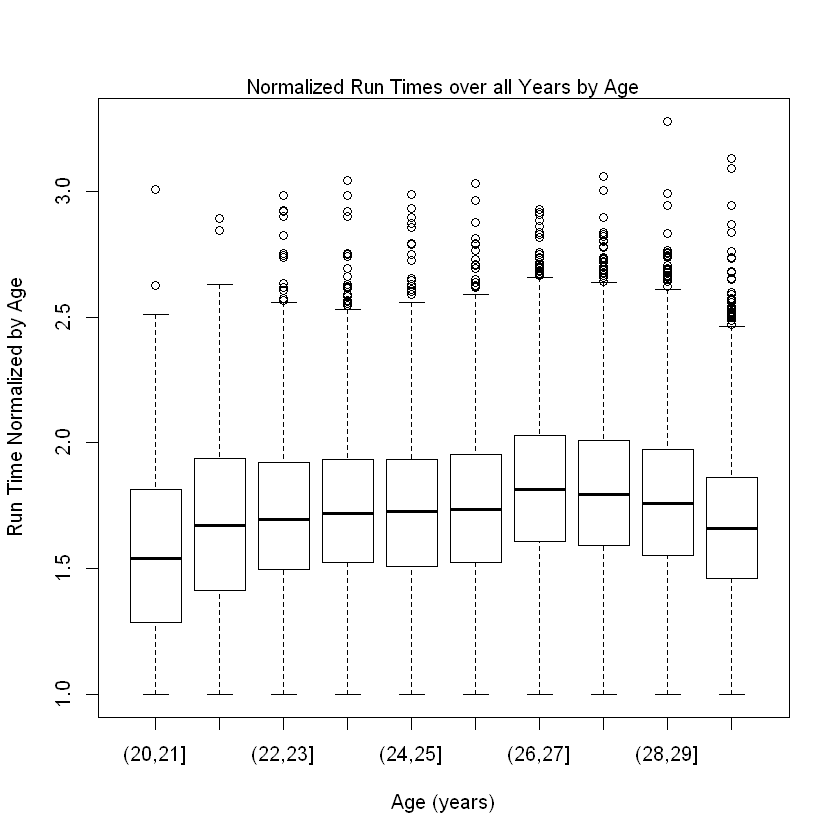

In [146]:
ageCat = cut(df$age, breaks = seq(20, 30, 1))
plot(df$normTime ~ ageCat, 
     xlab = "Age (years)", ylab = "Run Time Normalized by Age")
mtext("Normalized Run Times over all Years by Age", side = 3)

In [155]:
mods = lapply(1999:2012, function (x) loess(normTime ~ age, data = df[df$year==x,]))
names(mods) = 1999:2012

In [157]:
#now predict for each year
ages = 20:80
lo.prs = lapply(1999:2012, function (x) predict(mods[[as.character(x)]], newdata=data.frame(age = ages)))
names(lo.prs) = 1999:2012
head(lo.prs[["1999"]])

1        2        3        4        5        6 
1.619342 1.627017 1.633283 1.637935 1.640770 1.641581

In [168]:
help(par)

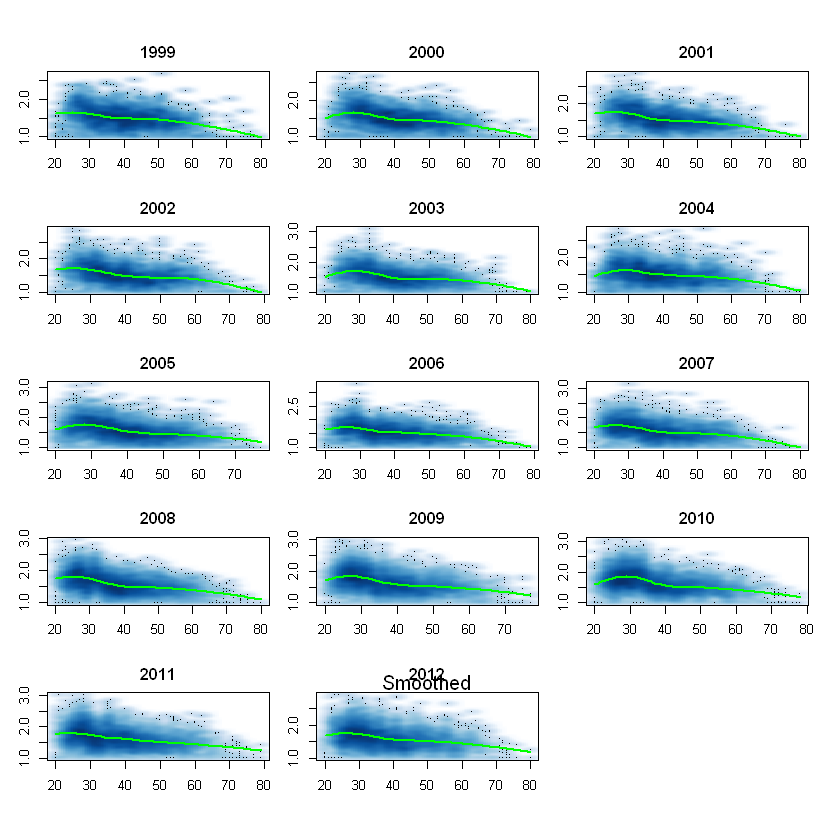

In [169]:
#now plot a few of them i guess
par(mfrow=c(5,3), mar=c(3,2,2.5,1), oma=c(2, 1, 2, 1))
for (yr in 1999:2012){
    smoothScatter(x = df[df$year == yr, "age"], y = df[df$year == yr, "normTime"],
                  xlab = "Age (years)", ylab = "Normalized Run Time")
    title(as.character(yr))
    lines(x = 20:80, y = lo.prs[[as.character(yr)]], col = "green", lwd = 2)
}
mtext("Smoothed")

In [ ]:
# lmAge = lm(runTime ~ age, data = cbMenSub)
# lmAge$coefficients
# smoothScatter(x = df$age, y = lmAge$residuals,
#               xlab = "Age (years)", ylab = "Residuals")
# abline(h = 0, col = "purple", lwd = 3)
 
mods = lapply(1999:2012, function (x) loess(normTime ~ age, data = df[df$year==x,]))

age20to80 = 20:80

resid.lo.pr = 
  predict(resid.lo, newdata = data.frame(age = age20to80))

lines(x = age20to80, y = resid.lo.pr, col = "green", lwd = 2)

## Results

## Conclusion

## References
[1] Kaplan, Daniel and Nolan, Deborah. Data Science in R: A Case Studies Approach, Chapter 2: Modeling Runners’ Times in the Cherry Blossom Race. 2015 Taylor & Francis Group, LLC.